## Import Library

In [100]:
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply
from skimage.io import imread, imshow, show
from skimage.transform import SimilarityTransform, warp, swirl
from scipy.ndimage import affine_transform
import matplotlib.image as mpimg
import matplotlib.pylab as plt
import numpy as np

## Image Blending

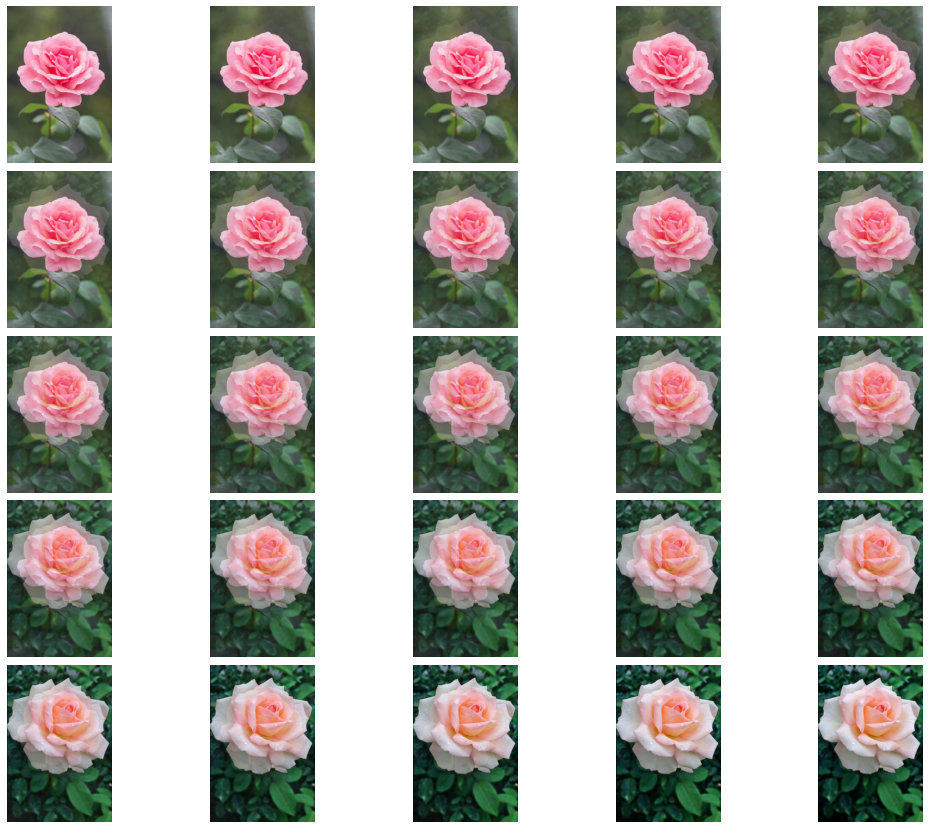

In [11]:
im1 = mpimg.imread("./Flower1.jpeg") / 255 #Scale RGB Values [0,1]
im2 = mpimg.imread("./Flower2.jpg") / 255
i = 1
plt.figure(figsize=(18,15))
for alpha in np.linspace(0,1,25):
    plt.subplot(5,5,i)
    plt.imshow((1-alpha)*im1 + alpha*im2)
    plt.axis('off')
    i += 1
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

## Cropping Image

In [15]:
im3 = Image.open("Flower3.jpg")
print (im3.width, im3.height, im3.mode, im3.format)

612 612 RGB JPEG


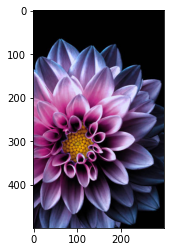

In [37]:
im3_crop = im3.crop((200,0,500,500))
plt.imshow(im3_crop)

## Negating Image

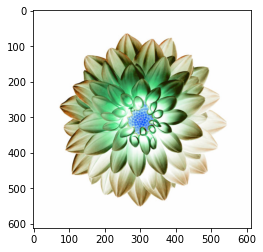

In [36]:
im3_negative = im3.point(lambda x:255-x)
plt.imshow(im3_negative)

## Convert Grayscale

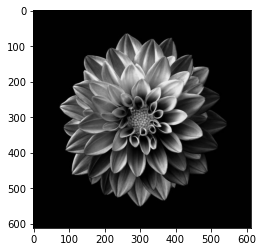

In [35]:
im_grayscale = im3.convert('L')
plt.imshow(im_grayscale, cmap="gray")

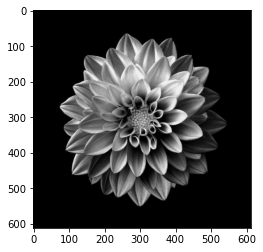

In [30]:
# Log Transform Grayscale
im3_log = im_grayscale.point(lambda x: 255*np.log(1+x/255))
plt.imshow(im3_log, cmap="gray")

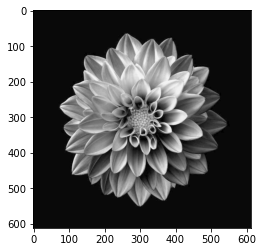

In [122]:
# Power Law Grayscale
im3_power = im_grayscale.point(lambda x: 255*(x/255)**0.6)
plt.imshow(im3_power, cmap="gray")

## Reflecting Image

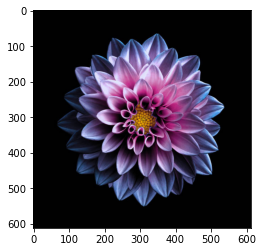

In [33]:
# Reflect vertical axis
im3_rotate_v = im3.transpose(Image.FLIP_LEFT_RIGHT)
plt.imshow(im3_rotate_v)

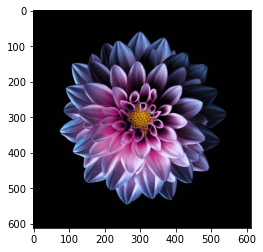

In [38]:
im3_rotate_v = im3.transpose(Image.FLIP_TOP_BOTTOM)
plt.imshow(im3_rotate_v)

## Rotate Image

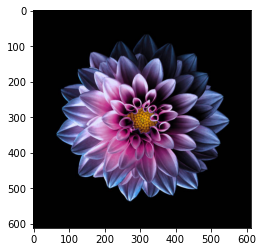

In [42]:
im3_rotate45 = im3.rotate(90)
plt.imshow(im3_rotate45)

## Salt and pepper noise add

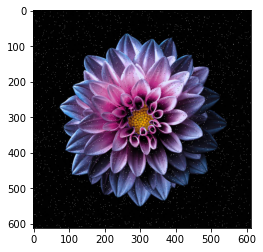

In [43]:
imcopy = im3.copy()
n = 5000
x, y = np.random.randint(0, imcopy.width, n), np.random.randint(0, imcopy.height, n)
for (x,y) in zip(x,y):
    imcopy.putpixel((x,y),(0,0,0) if np.random.rand() < 0.5 else (255,255,255))
plt.imshow(imcopy)

## Drawing image

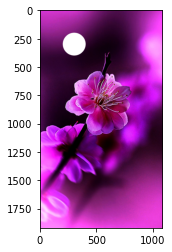

In [127]:
im4 = Image.open("flower4.jpg")
draw = ImageDraw.Draw(im4)
draw.ellipse((200,200,400,400), fill = (255,255,255,128))
del draw
plt.imshow(im4)

## Drawing text to image

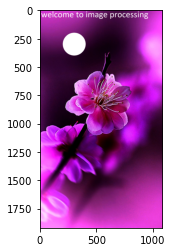

In [128]:
draw = ImageDraw.Draw(im4)
font = ImageFont.truetype("calibri.ttf",78)
draw.text((10,5), "welcome to image processing", font = font)
del draw
plt.imshow(im4)

## Superimposing

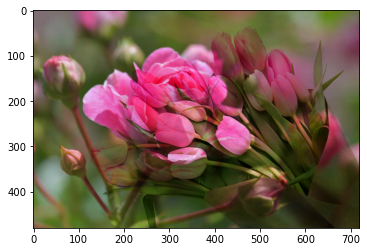

In [102]:
im5 = Image.open("flower5.jpg")
im6 = Image.open("flower6.jpg").convert("RGB").resize((im5.width,im5.height))
im_multiply = multiply(im5, im6)
plt.imshow(im_multiply)

## Add Two Image

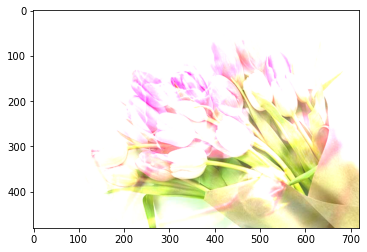

In [103]:
im_add = add(im5, im6)
plt.imshow(im_add)

## Subtract Two Image

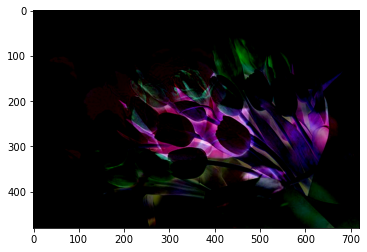

In [104]:
im_sub = subtract(im5, im6)
plt.imshow(im_sub)

## Affine Transformation


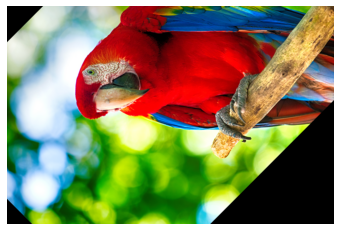

(<matplotlib.image.AxesImage at 0x1564be7acd0>,
 (-0.5, 1599.5, 1064.5, -0.5),
 None)

In [109]:
im_par = imread("parrot.jpg")
tform = SimilarityTransform(scale=0.8, rotation=np.pi/4, translation=(im_par.shape[0]/2, -100))
warped = warp(im_par, tform)
plt.imshow(warped), plt.axis('off'), plt.show()

## Swirl Transform

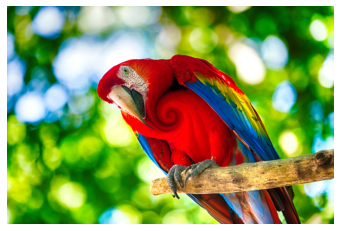

(<matplotlib.image.AxesImage at 0x15654b6b700>,
 (-0.5, 1599.5, 1064.5, -0.5),
 None)

In [114]:
im_par = imread("parrot.jpg")
swirled = swirl(im_par, rotation=0, strength=10, radius=300)
plt.imshow(swirled), plt.axis('off'), plt.show()